In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

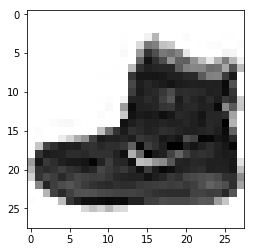

In [6]:
plt.imshow(x_train[0],cmap='gray_r')

In [7]:
y_train[0]

9

In [8]:
x_train.max()

255

In [9]:
x_train = x_train / 255

In [10]:
x_test = x_test / 255

In [11]:
x_train = x_train.reshape(60000,28,28,1)

In [12]:
x_test = x_test.reshape(10000,28,28,1)

In [13]:
from keras.utils import to_categorical

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
y_cat_train = to_categorical(y_train)

In [16]:
y_cat_test = to_categorical(y_test)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.4022 - acc: 0.8569
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2734 - acc: 0.9009
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2380 - acc: 0.9133
Epoch 4/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.2131 - acc: 0.9232
Epoch 5/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1944 - acc: 0.9307
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1797 - acc: 0.9363
Epoch 7/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1662 - acc: 0.9395
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1546 - acc: 0.9459
Epoch 9/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1457 - acc: 0.9487
Epoch 10/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1362 - acc: 0.9537

In [22]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 310us/step


[0.3028834395587444, 0.9047]

In [23]:
model.metrics_names

['loss', 'acc']

In [24]:
from sklearn.metrics import classification_report

In [25]:
predictions = model.predict_classes(x_test)

In [26]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       1.00      0.97      0.98      1000
          2       0.87      0.81      0.84      1000
          3       0.93      0.88      0.90      1000
          4       0.78      0.90      0.84      1000
          5       0.97      0.99      0.98      1000
          6       0.74      0.76      0.75      1000
          7       0.96      0.97      0.96      1000
          8       0.98      0.98      0.98      1000
          9       0.98      0.95      0.97      1000

avg / total       0.91      0.90      0.91     10000

